In [ ]:
import kagglehub
import os
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from glob import glob

# Download dataset
path = kagglehub.dataset_download("ashery/chexpert")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/chexpert


In [ ]:
%cd /kaggle/input/chexpert

/kaggle/input/chexpert


Data Pre-processing

In [ ]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/chexpert/train.csv')
df_valid = pd.read_csv('/kaggle/input/chexpert/valid.csv')
print (df_train.head())
print (df_valid.head())

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

In [ ]:
df_train = df_train.fillna(0)
df_train.head()
df_valid = df_valid.fillna(0)
df_valid.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_cols = df_train.columns[5:]
label_cols

Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [ ]:

df_train[label_cols] = df_train[label_cols].replace({-1: 0})
df_train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train["Frontal/Lateral"].value_counts()

,count
Frontal/Lateral,
Frontal,191027
Lateral,32387


In [ ]:
df_train["Pneumothorax"].value_counts()



,count
Pneumothorax,
0.0,203966
1.0,19448


In [ ]:
df_train["Pneumonia"].value_counts()

,count
Pneumonia,
0.0,217375
1.0,6039


In [ ]:
df_train = df_train[df_train["Frontal/Lateral"] == "Frontal"]
df_train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filter the dataframes to include only 'Pneumonia' and 'Pneumothorax'
df_train_filtered = df_train[(df_train['Pneumonia'] == 1) | (df_train['Pneumothorax'] == 1)].copy()
df_valid_filtered = df_valid[(df_valid['Pneumonia'] == 1) | (df_valid['Pneumothorax'] == 1)].copy()

# Update the label_cols to include only 'Pneumonia' and 'Pneumothorax'
label_cols_filtered = ['Pneumonia', 'Pneumothorax']

print("Filtered training data head:")
print(df_train_filtered.head())
print("\nFiltered validation data head:")
print(df_valid_filtered.head())
print(df_train_filtered.count())


Filtered training data head:
                                                 Path     Sex  Age  \
9   CheXpert-v1.0-small/train/patient00005/study2/...    Male   33   
10  CheXpert-v1.0-small/train/patient00005/study2/...    Male   33   
12  CheXpert-v1.0-small/train/patient00007/study1/...    Male   69   
23  CheXpert-v1.0-small/train/patient00011/study5/...  Female   19   
25  CheXpert-v1.0-small/train/patient00011/study4/...  Female   19   

   Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  \
9          Frontal    AP         0.0                         0.0   
10         Frontal    AP         0.0                         0.0   
12         Frontal    AP         0.0                         0.0   
23         Frontal    AP         0.0                         0.0   
25         Frontal    AP         0.0                         0.0   

    Cardiomegaly  Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  \
9            0.0           0.0          0.0    0.0           

In [ ]:
print(df_valid_filtered.count())

Path                          16
Sex                           16
Age                           16
Frontal/Lateral               16
AP/PA                         16
No Finding                    16
Enlarged Cardiomediastinum    16
Cardiomegaly                  16
Lung Opacity                  16
Lung Lesion                   16
Edema                         16
Consolidation                 16
Pneumonia                     16
Atelectasis                   16
Pneumothorax                  16
Pleural Effusion              16
Pleural Other                 16
Fracture                      16
Support Devices               16
dtype: int64


In [ ]:
df_train_filtered["Path"] = df_train["Path"].str.replace("CheXpert-v1.0-small/",'')
df_train_filtered["Path"][:2]

,Path
9,train/patient00005/study2/view1_frontal.jpg
10,train/patient00005/study2/view2_frontal.jpg


In [ ]:
# Modify the 'Path' column in the filtered dataframes
# Ensure we operate on the filtered dataframes themselves
df_train_filtered["Path"] = df_train_filtered["Path"].str.replace("CheXpert-v1.0-small/", '')
df_valid_filtered["Path"] = df_valid_filtered["Path"].str.replace("CheXpert-v1.0-small/", '') # Corrected to use df_valid_filtered

print("Updated 'Path' column in filtered training data head:")
print(df_train_filtered["Path"][:5])
print("\nUpdated 'Path' column in filtered validation data head:")
print(df_valid_filtered["Path"][:5])

Updated 'Path' column in filtered training data head:
9     train/patient00005/study2/view1_frontal.jpg
10    train/patient00005/study2/view2_frontal.jpg
12    train/patient00007/study1/view1_frontal.jpg
23    train/patient00011/study5/view1_frontal.jpg
25    train/patient00011/study4/view1_frontal.jpg
Name: Path, dtype: object

Updated 'Path' column in filtered validation data head:
7     valid/patient64547/study1/view1_frontal.jpg
8     valid/patient64547/study1/view2_frontal.jpg
9     valid/patient64547/study1/view3_lateral.jpg
10    valid/patient64548/study1/view1_frontal.jpg
15    valid/patient64552/study1/view1_frontal.jpg
Name: Path, dtype: object


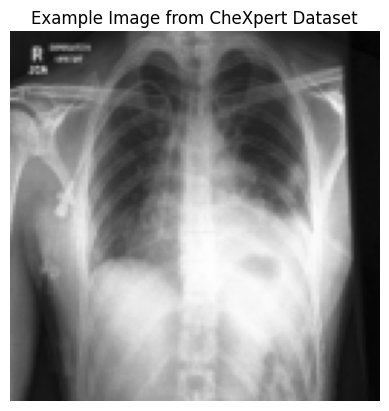

Labels for this image:
Pneumonia: 0
Pneumothorax: 1


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Define CheXpertDataset class (assuming it's not defined globally)
class CheXpertDataset(Dataset):
    def __init__(self, dataframe, transform=None, main_dir='/kaggle/input/chexpert/'): # Corrected main_dir
        self.dataframe = dataframe
        self.transform = transform
        self.main_dir = main_dir
        # Assuming labels are in the last two columns after filtering
        self.label_cols = ['Pneumonia', 'Pneumothorax']

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = os.path.join(self.main_dir, self.dataframe.iloc[idx]['Path'])
        image = Image.open(img_path).convert("RGB") # Convert to RGB to handle potential grayscale images uniformly
        labels = self.dataframe.iloc[idx][self.label_cols].values.astype(np.float32) # Error line

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(labels)

# Define transformations (you can reuse the 'preprocess' defined earlier or define a new one)
# preprocess is defined in cell eUxb88QjZ63w
IMG_SIZE = 128 # Assuming IMG_SIZE is defined globally or in a previous cell
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(), # ToTensor() typically outputs float32, but explicitly ensure
    transforms.ConvertImageDtype(torch.float32), # Add this to ensure float32
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Using ImageNet norms as a common starting point
])

# Assuming df_train_filtered is loaded in a previous cell
# Create the dataset and dataloader
train_dataset = CheXpertDataset(df_train_filtered, transform=transform, main_dir='/kaggle/input/chexpert/')


# Get the first image and labels from the training dataset
first_image, first_labels = train_dataset[0]

# The image is a PyTorch tensor, so we need to convert it to a NumPy array and change the channel order for matplotlib
# Permute the dimensions from (C, H, W) to (H, W, C) and convert to NumPy
image_np = first_image.permute(1, 2, 0).numpy()

# Denormalize the image for display
# Using the same ImageNet norms as used in the transform
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_np = std * image_np + mean
image_np = np.clip(image_np, 0, 1) # Clip values to be within [0, 1]

# Display the image
plt.imshow(image_np)
plt.title("Example Image from CheXpert Dataset")
plt.axis('off')
plt.show()

# Display the corresponding labels
label_names = train_dataset.label_cols
print("Labels for this image:")
for i, label in enumerate(first_labels):
    print(f"{label_names[i]}: {int(label.item())}")

**Explanation:**

1.  **`UNet` Class:** This defines a basic U-Net architecture, which is commonly used in diffusion models for its ability to capture features at multiple scales.
2.  **`DiffusionModel` Class:**
    *   Initializes the U-Net model and the number of timesteps for the diffusion process.
    *   `linear_schedule`: Defines a simple linear schedule for the beta values (variance of the noise added at each timestep).
    *   `forward_diffusion`: Implements the forward diffusion process, adding noise to the input image based on the timestep.
    *   `forward`: This is the main training function for the diffusion model. It samples random timesteps, adds noise to the input images using `forward_diffusion`, and then uses the U-Net model to predict the added noise.
3.  **Model Instantiation and Optimizer:**
    *   An instance of the `UNet` is created and wrapped in the `DiffusionModel`.
    *   The model is moved to the appropriate device (GPU if available).
    *   An Adam optimizer is initialized.
    *   Mean Squared Error (MSE) is used as the loss function to compare the predicted noise with the actual noise.
4.  **Training Loop:**
    *   The code iterates through the specified number of epochs.
    *   Inside the epoch loop, it iterates through batches of images and labels from the `train_dataloader`.
    *   Images and labels are moved to the device.
    *   The `diffusion_model` is called with the images to get the predicted noise, actual noise, and timesteps.
    *   The MSE loss is calculated between the predicted and actual noise.
    *   Backpropagation is performed, and the optimizer updates the model's weights.
    *   The loss is printed periodically to monitor training progress.

**Next Steps:**

*   **Conditional Generation:** To generate images for specific labels, you'll need to modify the U-Net to take the label information as an additional input (e.g., by embedding the labels and concatenating them with the image features).
*   **Sampling:** Implement the reverse diffusion (sampling) process to generate new images from random noise using the trained model.
*   **Evaluation:** Evaluate the quality of the generated images using appropriate metrics and visual inspection.
*   **Hyperparameter Tuning:** Experiment with different hyperparameters (learning rate, batch size, number of timesteps, network architecture details, etc.) to improve performance.
*   **Advanced Techniques:** Explore more advanced diffusion model techniques like improved sampling methods, different noise schedules, and attention mechanisms in the U-Net.

In [ ]:
import torch.nn as nn
import torch
import math

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim
        self.register_buffer('embeddings', self._precompute_embeddings(dim))

    def _precompute_embeddings(self, dim):
        half_dim = dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim) * -emb)
        return emb

    def forward(self, time):
        device = time.device
        embeddings = self.embeddings.to(device)
        embeddings = time[:, None] * embeddings[None, :]

        # The output shape should be (batch_size, dim) for the linear layers
        # Concatenate the sin and cos parts along the last dimension
        output = torch.cat([embeddings.sin(), embeddings.cos()], dim=-1)
        return output

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, num_classes=2, time_dim=256):
        super().__init__()

        self.num_classes = num_classes
        self.label_embedding = nn.Embedding(num_classes, time_dim) # Match label embedding dim to time_dim

        self.time_mlp = nn.Sequential(
            SinusoidalPositionEmbeddings(time_dim),
            nn.Linear(time_dim, time_dim),
            nn.ReLU(),
            nn.Linear(time_dim, time_dim)
        )

        # Downsampling path
        self.inc = self.double_conv(in_channels, 64)
        # Input channels for down1's double_conv: output of inc (64) + combined embeddings (time_dim*2)
        self.down1 = self.down(64 + time_dim * 2, 128)
        self.down2 = self.down(128 + time_dim * 2, 256)
        self.down3 = self.down(256 + time_dim * 2, 512)

        # Bottleneck
        self.bottleneck = self.double_conv(512 + time_dim * 2, 1024)

        # Upsampling path
        # up1's ConvTranspose2d takes input from bottleneck (1024) and outputs channels matching skip connection x3 (256)
        self.up1 = nn.ConvTranspose2d(1024, 256, kernel_size=2, stride=2)
        # The double_conv after upsampling and skip connection
        # Input channels: output of up1 (256) + skip connection x3 (256) + combined embeddings (time_dim*2)
        self.upconv1 = self.double_conv(256 + 256 + time_dim * 2, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.upconv2 = self.double_conv(128 + 128 + time_dim * 2, 128)

        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.upconv3 = self.double_conv(64 + 64 + time_dim * 2, 64)

        self.outc = nn.Conv2d(64, out_channels, kernel_size=1)

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def down(self, in_channels, out_channels):
        return nn.Sequential(
            nn.MaxPool2d(2),
            # The double_conv here takes the concatenated input
            self.double_conv(in_channels, out_channels)
        )


    def forward(self, x, labels, time):
        label_indices = torch.argmax(labels, dim=1)
        label_emb = self.label_embedding(label_indices)
        t_emb = self.time_mlp(time)

        # Combine time and label embeddings
        combined_emb = torch.cat([t_emb, label_emb], dim=1)

        # Reshape combined embedding to match feature map dimensions for concatenation
        combined_emb = combined_emb.unsqueeze(-1).unsqueeze(-1)

        # Downsampling path with concatenation before each down block
        x1 = self.inc(x)
        x1_cat = torch.cat([x1, combined_emb.repeat(1, 1, x1.shape[-2], x1.shape[-1])], dim=1)

        x2 = self.down1(x1_cat)
        x2_cat = torch.cat([x2, combined_emb.repeat(1, 1, x2.shape[-2], x2.shape[-1])], dim=1)

        x3 = self.down2(x2_cat)
        x3_cat = torch.cat([x3, combined_emb.repeat(1, 1, x3.shape[-2], x3.shape[-1])], dim=1)

        x4 = self.down3(x3_cat)
        x4_cat = torch.cat([x4, combined_emb.repeat(1, 1, x4.shape[-2], x4.shape[-1])], dim=1)

        # Bottleneck with embeddings
        x5 = self.bottleneck(x4_cat)
        # No concatenation after bottleneck before passing to upsampling ConvTranspose2d

        # Upsampling path with skip connections and embeddings
        x = self.up1(x5) # up1's ConvTranspose2d takes x5, output is 32x32, 256 channels
        x = torch.cat([x, x3], dim=1) # Concatenate with skip connection x3 (32x32, 256 channels)
        # Concatenate embeddings before applying the double_conv
        x = torch.cat([x, combined_emb.repeat(1, 1, x.shape[-2], x.shape[-1])], dim=1)
        x = self.upconv1(x) # Apply double_conv

        x = self.up2(x) # up2's ConvTranspose2d takes the output of upconv1, output is 64x64, 128 channels
        x = torch.cat([x, x2], dim=1) # Concatenate with skip connection x2 (64x64, 128 channels)
        # Concatenate embeddings
        x = torch.cat([x, combined_emb.repeat(1, 1, x.shape[-2], x.shape[-1])], dim=1)
        x = self.upconv2(x) # Apply double_conv

        x = self.up3(x) # up3's ConvTranspose2d takes the output of upconv2, output is 128x128, 64 channels
        x = torch.cat([x, x1], dim=1) # Concatenate with skip connection x1 (128x128, 64 channels)
        # Concatenate embeddings
        x = torch.cat([x, combined_emb.repeat(1, 1, x.shape[-2], x.shape[-1])], dim=1)
        x = self.upconv3(x) # Apply double_conv


        output = self.outc(x)
        return output

In [ ]:
class DiffusionModel(nn.Module):
    def __init__(self, model, timesteps=500, time_dim=256):
        super().__init__()
        self.model = model
        self.timesteps = timesteps
        self.time_dim = time_dim

        self.betas = self.linear_schedule(timesteps)
        self.alphas = 1. - self.betas
        self.register_buffer('alpha_bars', torch.cumprod(self.alphas, dim=0).float())

    def linear_schedule(self, timesteps):
        scale = 1000 / timesteps
        beta_start = scale * 0.0001
        beta_end = scale * 0.02
        return torch.linspace(beta_start, beta_end, timesteps, dtype=torch.float64)

    def forward_diffusion(self, x_0, t, noise):
        x_0 = x_0.float()
        noise = noise.float()
        alpha_bar_t = self.alpha_bars[t].view(-1, 1, 1, 1)
        x_t = torch.sqrt(alpha_bar_t) * x_0 + torch.sqrt(1. - alpha_bar_t) * noise
        return x_t

    def forward(self, x_0, labels):
        t = torch.randint(0, self.timesteps, (x_0.shape[0],), device=x_0.device).long()
        noise = torch.randn_like(x_0)
        x_t = self.forward_diffusion(x_0, t, noise)
        predicted_noise = self.model(x_t, labels, t.float())  # Pass time as float
        return predicted_noise, noise, t

@torch.no_grad()
def sample(model, num_images, timesteps, img_size, num_classes, labels, device):
    x_t = torch.randn(num_images, 3, img_size, img_size).to(device)

    if labels.ndim == 1:
        labels_one_hot = torch.zeros(num_images, num_classes).to(device)
        labels_one_hot[torch.arange(num_images), labels] = 1
        labels = labels_one_hot
    else:
        labels = labels.to(device)

    for t in reversed(range(timesteps)):
        t_tensor = torch.full((num_images,), t, device=device, dtype=torch.float)  # Pass time as float

        predicted_noise = model.model(x_t, labels, t_tensor)

        beta_t = model.betas[t].to(device)
        alpha_t = model.alphas[t].to(device)
        alpha_bar_t = model.alpha_bars[t].to(device)

        mean = (1 / torch.sqrt(alpha_t)) * (x_t - (beta_t / torch.sqrt(1 - alpha_bar_t)) * predicted_noise)
        variance = beta_t

        if t > 0:
            noise = torch.randn_like(x_t)
        else:
            noise = torch.zeros_like(x_t)

        x_t = mean + torch.sqrt(variance) * noise

    x_0 = torch.clamp(x_t, -1., 1.)

    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)
    x_0 = std * x_0 + mean
    x_0 = torch.clamp(x_0, 0., 1.)

    return x_0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math
import os # Import os for checkpoint file handling
import matplotlib.pyplot as plt # Import matplotlib for potential future use or if needed in the integrated code
from torch.optim.lr_scheduler import MultiStepLR # Import MultiStepLR

# Instantiate the model and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Make sure to instantiate UNet with num_classes
# Assuming train_dataset is defined and has label_cols attribute
unet_model = UNet(num_classes=len(label_cols_filtered)).to(device) # Use label_cols_filtered for num_classes
diffusion_model = DiffusionModel(unet_model, timesteps=300).to(device) # Changed timesteps to 300
# Changed optimizer to AdamW, learning rate to 1e-4, and added weight_decay
optimizer = optim.AdamW(diffusion_model.parameters(), lr=1e-4, weight_decay=2e-4) # Added weight_decay
criterion = nn.MSELoss()

# Define a learning rate scheduler
# Decrease learning rate by a factor of 0.1 after epochs 10, 20, and 30
scheduler = MultiStepLR(optimizer, milestones=[61, 75, 80], gamma=0.65)

# Define checkpoint path
checkpoint_path = '/kaggle/diffusion_model_checkpoint.pth' # Changed path to a writable directory

# Initialize lists to store average loss per epoch
epoch_losses = []
# val_losses = [] # Removed validation loss list

# Define gradient accumulation steps
gradient_accumulation_steps = 4 # Accumulate gradients over 4 batches

# Check if a checkpoint exists and load it
start_epoch = 0
if os.path.exists(checkpoint_path):
    print(f"Loading checkpoint from {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path)
    diffusion_model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    # Check if scheduler state is in checkpoint and load it
    if 'scheduler_state_dict' in checkpoint:
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    start_epoch = checkpoint['epoch'] +
    # Load epoch_losses if saved in checkpoint
    if 'epoch_losses' in checkpoint:
        epoch_losses = checkpoint['epoch_losses']
    # if 'val_losses' in checkpoint: # Removed loading of validation losses
    #     val_losses = checkpoint['val_losses']
    print(f"Resuming training from epoch {start_epoch}")


train_dataset = CheXpertDataset(df_train_filtered, transform=transform, main_dir='/kaggle/input/chexpert/') # Use df_train_filtered
# Adjusted batch size based on previous testing to avoid OOM errors
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True) # Changed batch size to 32
# valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False) # Removed validation dataloader

# Training loop
num_epochs = 75 # You'll likely need more epochs, adjust as needed

for epoch in range(start_epoch, num_epochs):
    diffusion_model.train() # Set model to training mode
    total_loss = 0 # Initialize total loss for the epoch
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device).float() # Cast images to float32
        labels = labels.to(device) # Move labels to device

        # Pass labels to the diffusion_model
        predicted_noise, noise, t = diffusion_model(images, labels)
        loss = criterion(predicted_noise, noise)

        # Normalize the loss to account for gradient accumulation
        loss = loss / gradient_accumulation_steps

        loss.backward()

        # Perform optimizer step and zero gradients every 'gradient_accumulation_steps' batches
        if (i + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        total_loss += loss.item() * gradient_accumulation_steps # Accumulate the actual loss before normalization

        if (i + 1) % 100 == 0: # Print loss every 100 batches (of original batch size)
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Train Loss: {loss.item() * gradient_accumulation_steps:.4f}') # Print actual loss

    # Perform a final optimizer step if there are accumulated gradients
    if (i + 1) % gradient_accumulation_steps != 0:
        optimizer.step()
        optimizer.zero_grad()


    # Calculate average training loss for the epoch and store it
    avg_train_loss = total_loss / len(train_dataloader)
    epoch_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}] Average Train Loss: {avg_train_loss:.4f}')
    # Step the learning rate scheduler
    scheduler.step()
    print(f"Learning rate stepped. Current learning rate: {scheduler.get_last_lr()}")


    # Save checkpoint after each epoch
    print(f"Saving checkpoint after epoch {epoch+1}")
    torch.save({
        'epoch': epoch,
        'model_state_dict': diffusion_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(), # Save scheduler state
        'train_loss': avg_train_loss, # Save average training loss
        # 'val_loss': avg_val_loss, # Removed saving of validation loss
        'epoch_losses': epoch_losses, # Save the list of average training losses
        # 'val_losses': val_losses # Removed saving of validation losses
    }, checkpoint_path)


print("Training finished!")

Loading checkpoint from /kaggle/diffusion_model_checkpoint.pth
Resuming training from epoch 75
Training finished!


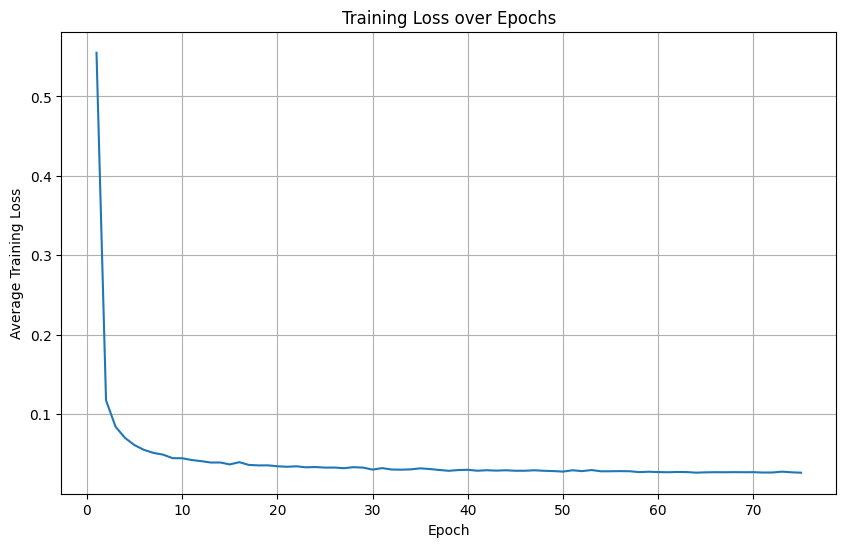

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'epoch_losses' is available in the environment from the previous training cell
if 'epoch_losses' in locals() and len(epoch_losses) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(epoch_losses) + 1), epoch_losses)
    plt.xlabel('Epoch')
    plt.ylabel('Average Training Loss')
    plt.title('Training Loss over Epochs')
    plt.grid(True)
    plt.show()
else:
    print("No training loss data available to plot.")

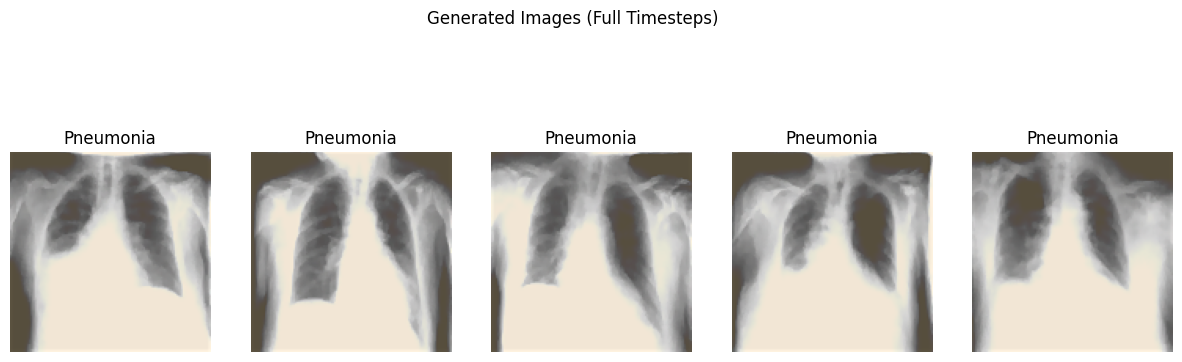

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import MultiStepLR

@torch.no_grad()
def sample(model, num_images, timesteps, img_size, num_classes, labels, device):
    # Start with random noise
    x_t = torch.randn(num_images, 3, img_size, img_size).to(device)

    # Label handling (one-hot if needed)
    if labels.ndim == 1:
        labels_one_hot = torch.zeros(num_images, num_classes).to(device)
        labels_one_hot[torch.arange(num_images), labels] = 1
        labels = labels_one_hot
    else:
        labels = labels.to(device)

    # ---- REVERTED SAMPLING LOOP WITH NOISE REDUCTION ----
    for t in reversed(range(timesteps)):
        t_tensor = torch.full((num_images,), t, device=device, dtype=torch.float)
        predicted_noise = model.model(x_t, labels, t_tensor)

        # Calculate coefficients
        beta_t = model.betas[t].to(device)
        alpha_t = model.alphas[t].to(device)
        alpha_bar_t = model.alpha_bars[t].to(device)

        mean = (1 / torch.sqrt(alpha_t)) * (x_t - (beta_t / torch.sqrt(1 - alpha_bar_t)) * predicted_noise)
        variance = beta_t

        # Reduced noise injection with lower multiplier
        if t > 0:
            noise = torch.randn_like(x_t) * 0.8  # Reduced noise by 20%
        else:
            noise = torch.zeros_like(x_t)

        x_t = mean + torch.sqrt(variance) * noise

    # Clamp and denormalize
    x_0 = torch.clamp(x_t, -1., 1.)
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)
    x_0 = std * x_0 + mean
    x_0 = torch.clamp(x_0, 0., 1.)

    # ---- ENHANCED SHARPENING ----
    # First apply mild bilateral filtering to reduce noise while preserving edges
    x_np = x_0.cpu().permute(0, 2, 3, 1).numpy()
    filtered = []
    for img in x_np:
        img = (img * 255).astype(np.uint8)
        filtered_img = cv2.bilateralFilter(img, d=5, sigmaColor=15, sigmaSpace=15)
        filtered.append(filtered_img / 255.0)
    x_0 = torch.tensor(np.array(filtered), device=device).permute(0, 3, 1, 2)

    # Then apply stronger unsharp masking
    kernel = torch.ones(3, 1, 5, 5, device=device) / 75
    kernel = kernel.to(x_0.dtype)
    blurred = torch.nn.functional.conv2d(
        x_0,
        kernel,
        padding=2,
        groups=3
    )
    x_0 = torch.clamp(1.5 * x_0 - 0.5 * blurred, 0., 1.)  # Increased sharpening factor

    return x_0

# Example usage (without stride):
num_generated_images = 5
label_names_filtered = ['Pneumonia', 'Pneumothorax']
#label_indices_to_generate = [label_names_filtered.index("Pneumothorax")]
label_indices_to_generate = [label_names_filtered.index("Pneumonia")] # Example: Generate Pneumothorax images

labels_to_generate = torch.zeros(num_generated_images, len(label_names_filtered))
labels_to_generate[:, label_indices_to_generate[0]] = 1

# Generate images without stride (using all timesteps)
generated_images = sample(diffusion_model, num_generated_images,
                         diffusion_model.timesteps, IMG_SIZE,
                         len(label_names_filtered), labels_to_generate, device)


# Display results (using cmap='bone' for grayscale)
fig, axes = plt.subplots(1, num_generated_images, figsize=(15, 5))
for i in range(num_generated_images):
    img = generated_images[i].cpu().permute(1, 2, 0).numpy()
    axes[i].imshow(img, cmap='bone')
    axes[i].axis('off')
    axes[i].set_title(label_names_filtered[label_indices_to_generate[0]])
plt.suptitle(f"Generated Images (Full Timesteps)") # Updated title
plt.show()

In [ ]:
import torch
import os

# Define the path to your full training checkpoint
checkpoint_path = '/kaggle/diffusion_model_checkpoint.pth'

# Define the path where you want to save the final model weights file
final_weights_path = '/kaggle/diffusion_model_weights.pth' # Changed filename for clarity

# Check if the checkpoint file exists
if os.path.exists(checkpoint_path):
    print(f"Loading checkpoint from {checkpoint_path}")
    try:
        # Load the checkpoint, mapping it to CPU first
        checkpoint = torch.load(checkpoint_path, map_location='cpu')

        # Extract the model's state dictionary
        model_state_dict = None
        if 'model_state_dict' in checkpoint:
            model_state_dict = checkpoint['model_state_dict']
            print("Model state dictionary extracted from checkpoint.")
        elif isinstance(checkpoint, dict):
             # Handle cases where the checkpoint might just be the state_dict itself
             # Check if it looks like a state dictionary (has keys corresponding to model parameters)
             # This is a heuristic check, might not be perfect
            if any(key.endswith('.weight') or key.endswith('.bias') for key in checkpoint.keys()):
                 model_state_dict = checkpoint
                 print("Assuming checkpoint itself is the model state dictionary.")
            else:
                 print("Error: Checkpoint format not recognized. Could not find 'model_state_dict' or a valid state dictionary structure.")


        if model_state_dict is not None:
            # Save the model state dictionary
            torch.save(model_state_dict, final_weights_path)
            print(f"Final model weights saved to {final_weights_path}")
        else:
             print("Could not extract or find model state dictionary in the checkpoint.")

    except Exception as e:
        print(f"Error loading checkpoint or saving weights: {e}")
        print("Please ensure the checkpoint file exists and is not corrupted.")

else:
    print(f"Error: Checkpoint file not found at {checkpoint_path}. Please ensure the path is correct.")

Loading checkpoint from /kaggle/diffusion_model_checkpoint.pth
Model state dictionary extracted from checkpoint.
Final model weights saved to /kaggle/diffusion_model_weights.pth


## Load pre-trained inceptionv3 model

### Subtask:
Load a pre-trained InceptionV3 model, which will be used to extract features from the images.


**Reasoning**:
Load the pre-trained InceptionV3 model and set it to evaluation mode.



In [ ]:
from torchvision.models import inception_v3

# Load a pre-trained InceptionV3 model
inception_model = inception_v3(pretrained=True)

# Set the model to evaluation mode
inception_model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 215MB/s]


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

## Prepare real images

### Subtask:
Select a subset of real images from your training dataset and preprocess them to match the input requirements of the InceptionV3 model.


**Reasoning**:
Define the number of real images needed, select a random subset from the training dataframe, and create a custom dataset and dataloader with the appropriate transformations for the InceptionV3 model.



In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd

# Assuming df_train_filtered is loaded and filtered in a previous cell
# Assuming CheXpertDataset and its __getitem__ method are defined in a previous cell

# Define the number of real images per label to use for FID calculation
# This number should match the number of generated images per label
num_images_per_label = 100 # Use the same number as generated images per label

# Define transformations appropriate for InceptionV3
# InceptionV3 expects input images of size 299x299 and specific normalization
inception_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Function to load and preprocess images for a specific label
def load_real_images_for_label(dataframe, label_name, num_samples, transform, main_dir, device):
    print(f"Loading and preprocessing {label_name} real images...")
    # Filter the dataframe for the specific label
    df_label = dataframe[dataframe[label_name] == 1].copy()

    # Select a random subset of images for this label
    df_label_subset = df_label.sample(n=min(num_samples, len(df_label)), random_state=42).reset_index(drop=True)

    # Create a dataset and dataloader for this subset
    label_dataset = CheXpertDataset(df_label_subset, transform=transform, main_dir=main_dir)
    label_dataloader = DataLoader(label_dataset, batch_size=32, shuffle=False) # Adjust batch size as needed

    # Iterate through the DataLoader to load and preprocess images
    images_list = []
    for images, _ in label_dataloader:
        images = images.to(device)
        images_list.append(images)

    # Concatenate the batches into a single tensor
    if images_list:
        images_tensor = torch.cat(images_list, dim=0)
        print(f"Loaded and preprocessed {images_tensor.shape[0]} {label_name} real images.")
        return images_tensor
    else:
        print(f"No {label_name} real images were loaded.")
        return None

# Load and preprocess real images for each label
real_pneumonia_images = load_real_images_for_label(
    df_train_filtered, # Use df_train_filtered as requested
    'Pneumonia',
    num_images_per_label,
    inception_transform,
    '/kaggle/input/chexpert/',
    device
)

real_pneumothorax_images = load_real_images_for_label(
    df_train_filtered, # Use df_train_filtered as requested
    'Pneumothorax',
    num_images_per_label,
    inception_transform,
    '/kaggle/input/chexpert/',
    device
)

# Now 'real_pneumonia_images' and 'real_pneumothorax_images' are ready for feature extraction
if real_pneumonia_images is not None:
    print(f"Real Pneumonia images tensor shape: {real_pneumonia_images.shape}")
if real_pneumothorax_images is not None:
     print(f"Real Pneumothorax images tensor shape: {real_pneumothorax_images.shape}")

Loading and preprocessing Pneumonia real images...
Loaded and preprocessed 100 Pneumonia real images.
Loading and preprocessing Pneumothorax real images...
Loaded and preprocessed 100 Pneumothorax real images.
Real Pneumonia images tensor shape: torch.Size([100, 3, 299, 299])
Real Pneumothorax images tensor shape: torch.Size([100, 3, 299, 299])


**Reasoning**:
Load the checkpoint file, access the 'model_state_dict' key, and save this dictionary to a new file. This creates a cleaner weights file suitable for inference deployment on platforms like Hugging Face Spaces.

In [ ]:
import matplotlib.pyplot as plt
import torch
import os
from torchvision.utils import save_image
import time # Import the time module
import numpy as np
import cv2 # Import cv2 for image processing

@torch.no_grad() # We don't need to calculate gradients during sampling
def sample(model, num_images, timesteps, img_size, num_classes, labels, device):
    # Start with random noise
    x_t = torch.randn(num_images, 3, img_size, img_size).to(device) # Assuming 3 color channels

    # Ensure labels are on the correct device and have the correct shape
    # Assuming labels are provided as a list of class indices or one-hot vectors
    # If labels are class indices, convert them to one-hot encoding
    if labels.ndim == 1:
        labels_one_hot = torch.zeros(num_images, num_classes).to(device)
        labels_one_hot[torch.arange(num_images), labels] = 1
        labels = labels_one_hot
    else:
        labels = labels.to(device) # Assume labels are already one-hot or in the correct format


    # Iterate backwards through the timesteps
    for t in reversed(range(timesteps)):
        # Create a tensor for the current timestep repeated for the batch size
        t_tensor = torch.full((num_images,), t, device=device, dtype=torch.float)

        # Predict noise using the trained model (which is the U-Net inside the DiffusionModel)
        # Pass images, labels, and the time tensor to the UNet model
        predicted_noise = model.model(x_t, labels, t_tensor)

        # Calculate coefficients for the reverse diffusion step using parameters from the DiffusionModel
        beta_t = model.betas[t].to(device)
        alpha_t = model.alphas[t].to(device)
        alpha_bar_t = model.alpha_bars[t].to(device)

        # Calculate mean and variance for the reverse step
        mean = (1 / torch.sqrt(alpha_t)) * (x_t - (beta_t / torch.sqrt(1 - alpha_bar_t)) * predicted_noise)
        # Use learned variance if available, otherwise use beta_t
        # Here we use beta_t as a simple approach
        variance = beta_t

        if t > 0:
            noise = torch.randn_like(x_t)
        else:
            noise = torch.zeros_like(x_t)

        # Update the image
        x_t = mean + torch.sqrt(variance) * noise

    # Clamp the output to be within the valid range [0, 1]
    # Denormalization might be needed if the model output is in a different range
    # Assuming the model outputs are in the same range as the noise added
    x_0 = torch.clamp(x_t, -1., 1.) # Assuming noise is centered around 0

    # If images were normalized to [0, 1] during preprocessing, denormalize them
    # Denormalize using the mean and std used during training
    # Assuming ImageNet norms were used for normalization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)
    x_0 = std * x_0 + mean
    x_0 = torch.clamp(x_0, 0., 1.) # Ensure the final output is in [0, 1]

    # ---- ENHANCED SHARPENING ----
    # First apply mild bilateral filtering to reduce noise while preserving edges
    x_np = x_0.cpu().permute(0, 2, 3, 1).numpy()
    filtered = []
    for img in x_np:
        img = (img * 255).astype(np.uint8)
        filtered_img = cv2.bilateralFilter(img, d=5, sigmaColor=15, sigmaSpace=15)
        filtered.append(filtered_img / 255.0)
    x_0 = torch.tensor(np.array(filtered), device=device).permute(0, 3, 1, 2)

    # Then apply stronger unsharp masking
    kernel = torch.ones(3, 1, 5, 5, device=device) / 75
    kernel = kernel.to(x_0.dtype)
    blurred = torch.nn.functional.conv2d(
        x_0,
        kernel,
        padding=2,
        groups=3
    )
    x_0 = torch.clamp(1.5 * x_0 - 0.5 * blurred, 0., 1.)  # Increased sharpening factor

    return x_0


# Define the total number of images to generate per label for FID
total_images_per_label_to_generate = 1500 # Aim for a larger number for reliable FID


generation_batch_size = 50 # Adjusted batch size as a starting point

# Create a base directory to save the generated images
base_output_dir = '/kaggle/generated_images_by_label'
os.makedirs(base_output_dir, exist_ok=True)

label_names_filtered = ['Pneumonia', 'Pneumothorax'] # Ensure this is defined

print(f"Generating {total_images_per_label_to_generate} images for each of the following labels: {label_names_filtered}")

for label_to_generate in label_names_filtered:
    print(f"\nGenerating images for label: {label_to_generate}")
    # Create a label-specific output directory
    label_output_dir = os.path.join(base_output_dir, label_to_generate)
    os.makedirs(label_output_dir, exist_ok=True)

    # Determine the index of the current label
    label_index_to_generate = label_names_filtered.index(label_to_generate)

    images_generated_count = 0
    for i in range(0, total_images_per_label_to_generate, generation_batch_size):
        num_images_in_batch = min(generation_batch_size, total_images_per_label_to_generate - i)

        # Create label tensors for the current batch (one-hot encoding for the current label)
        labels_to_generate = torch.zeros(num_images_in_batch, len(label_names_filtered))
        labels_to_generate[:, label_index_to_generate] = 1 # Set the desired label

        # Generate a batch of images
        generated_images_batch = sample(diffusion_model, num_images_in_batch, diffusion_model.timesteps, IMG_SIZE, len(label_names_filtered), labels_to_generate, device)

        # Save the generated images in the batch to the label-specific directory
        for j in range(num_images_in_batch):
            img = generated_images_batch[j].cpu() # Move to CPU for saving
            # Save the image with a unique filename
            save_image(img, os.path.join(label_output_dir, f'generated_image_{images_generated_count:05d}.png')) # Save as PNG
            images_generated_count += 1

        # Check if 50 images have been generated and free up GPU memory
        if images_generated_count % 50 == 0:
            if torch.cuda.is_available():
                torch.cuda.empty_cache() # Free up unused cached memory
            time.sleep(0.001) # Small delay


        print(f"  Generated and saved {images_generated_count} / {total_images_per_label_to_generate} images for {label_to_generate}")

print("\nImage generation finished for all labels!")

Generating 1500 images for each of the following labels: ['Pneumonia', 'Pneumothorax']

Generating images for label: Pneumonia
  Generated and saved 50 / 1500 images for Pneumonia
  Generated and saved 100 / 1500 images for Pneumonia
  Generated and saved 150 / 1500 images for Pneumonia
  Generated and saved 200 / 1500 images for Pneumonia
  Generated and saved 250 / 1500 images for Pneumonia
  Generated and saved 300 / 1500 images for Pneumonia
  Generated and saved 350 / 1500 images for Pneumonia
  Generated and saved 400 / 1500 images for Pneumonia
  Generated and saved 450 / 1500 images for Pneumonia
  Generated and saved 500 / 1500 images for Pneumonia
  Generated and saved 550 / 1500 images for Pneumonia
  Generated and saved 600 / 1500 images for Pneumonia
  Generated and saved 650 / 1500 images for Pneumonia
  Generated and saved 700 / 1500 images for Pneumonia
  Generated and saved 750 / 1500 images for Pneumonia
  Generated and saved 800 / 1500 images for Pneumonia
  Generate

## Prepare Generated Images per Label for FID

### Subtask:
Load the generated images saved to disk in label-specific directories, preprocess them, and create separate tensors for each label.

**Reasoning**:
Read the generated image files from the 'Pneumonia' and 'Pneumothorax' subdirectories, apply the InceptionV3-specific transformations, and collect them into distinct PyTorch tensors for each label.

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from glob import glob

# Define the base directory where generated images were saved
base_generated_images_dir = '/kaggle/generated_images_by_label' # Matches the output dir in cell f3b087c5

# Define transformations appropriate for InceptionV3 (same as for real images)
# InceptionV3 expects input images of size 299x299 and specific normalization
inception_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Function to load and preprocess generated images for a specific label
def load_generated_images_for_label(base_dir, label_name, transform, device):
    print(f"Loading and preprocessing {label_name} generated images...")
    label_dir = os.path.join(base_dir, label_name)
    if not os.path.exists(label_dir):
        print(f"Error: Directory not found for generated {label_name} images: {label_dir}")
        return None

    # List all generated image files for this label
    image_files = glob(os.path.join(label_dir, '*.png')) # Assuming images were saved as .png

    # Load and preprocess the generated images
    images_list = []
    for img_file in image_files:
        try:
            img = Image.open(img_file).convert("RGB") # Open image and ensure RGB format
            img_processed = transform(img)
            images_list.append(img_processed)
        except Exception as e:
            print(f"Could not load or process image {img_file}: {e}")
            continue # Skip to the next image if there's an error

    # Concatenate the list of image tensors into a single tensor
    if images_list:
        images_tensor = torch.stack(images_list, dim=0).to(device) # Move to device
        print(f"Successfully loaded and preprocessed {len(images_list)} generated {label_name} images.")
        return images_tensor
    else:
        print(f"No generated {label_name} images were loaded or processed from {label_dir}.")
        return None

# Load and preprocess generated images for each label
generated_pneumonia_images = load_generated_images_for_label(
    base_generated_images_dir,
    'Pneumonia',
    inception_transform,
    device
)

generated_pneumothorax_images = load_generated_images_for_label(
    base_generated_images_dir,
    'Pneumothorax',
    inception_transform,
    device
)

# Now 'generated_pneumonia_images' and 'generated_pneumothorax_images' are ready for feature extraction
if generated_pneumonia_images is not None:
    print(f"Generated Pneumonia images tensor shape: {generated_pneumonia_images.shape}")
if generated_pneumothorax_images is not None:
     print(f"Generated Pneumothorax images tensor shape: {generated_pneumothorax_images.shape}")

Loading and preprocessing Pneumonia generated images...
Successfully loaded and preprocessed 1500 generated Pneumonia images.
Loading and preprocessing Pneumothorax generated images...
Successfully loaded and preprocessed 1500 generated Pneumothorax images.
Generated Pneumonia images tensor shape: torch.Size([1500, 3, 299, 299])
Generated Pneumothorax images tensor shape: torch.Size([1500, 3, 299, 299])


## Extract Features per Label

### Subtask:
Use the InceptionV3 model to extract features separately from the real and generated images for 'Pneumonia' and 'Pneumothorax'.

**Reasoning**:
Apply the `get_inception_features` function to the real and generated image tensors for each label to obtain their corresponding feature representations.

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset # Ensure TensorDataset is imported

# Define the device (should be consistent)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ensure inception_model is on the correct device and in evaluation mode
if 'inception_model' in locals() and inception_model is not None:
    inception_model = inception_model.to(device)
    inception_model.eval()
else:
    print("Error: InceptionV3 model ('inception_model') not found or not loaded.")
    # You might want to exit or raise an error here if the model is essential
    # For now, we will just print and continue, but subsequent steps will fail

# --- Extract features for Pneumonia ---
print("Extracting features for Real Pneumonia images...")
real_pneumonia_features = None
if real_pneumonia_images is not None and 'get_inception_features' in globals(): # Check if images and function are available
    try:
        # Create a DataLoader for real pneumonia images
        real_pneumonia_dataset_tensor = TensorDataset(real_pneumonia_images.cpu().contiguous().float())
        real_pneumonia_dataloader_features = DataLoader(real_pneumonia_dataset_tensor, batch_size=32, shuffle=False)
        real_pneumonia_features = get_inception_features(real_pneumonia_dataloader_features, inception_model, device)
        print(f"Real Pneumonia features shape: {real_pneumonia_features.shape}")
    except Exception as e:
        print(f"Error extracting features for Real Pneumonia: {e}")
        real_pneumonia_features = None # Set to None if extraction fails
else:
    if real_pneumonia_images is None:
        print("Skipping feature extraction for Real Pneumonia due to no images.")
    else:
         print("Skipping feature extraction for Real Pneumonia because 'get_inception_features' is not defined.")


print("\nExtracting features for Generated Pneumonia images...")
generated_pneumonia_features = None
if generated_pneumonia_images is not None and 'get_inception_features' in globals(): # Check if images and function are available
    try:
        # Create a DataLoader for generated pneumonia images
        generated_pneumonia_dataset_tensor = TensorDataset(generated_pneumonia_images.cpu().contiguous().float())
        generated_pneumonia_dataloader_features = DataLoader(generated_pneumonia_dataset_tensor, batch_size=32, shuffle=False)
        generated_pneumonia_features = get_inception_features(generated_pneumonia_dataloader_features, inception_model, device)
        print(f"Generated Pneumonia features shape: {generated_pneumonia_features.shape}")
    except Exception as e:
        print(f"Error extracting features for Generated Pneumonia: {e}")
        generated_pneumonia_features = None # Set to None if extraction fails
else:
    if generated_pneumonia_images is None:
        print("Skipping feature extraction for Generated Pneumonia due to no images.")
    else:
         print("Skipping feature extraction for Generated Pneumonia because 'get_inception_features' is not defined.")


# --- Extract features for Pneumothorax ---
print("\nExtracting features for Real Pneumothorax images...")
real_pneumothorax_features = None
if real_pneumothorax_images is not None and 'get_inception_features' in globals(): # Check if images and function are available
    try:
        # Create a DataLoader for real pneumothorax images
        real_pneumothorax_dataset_tensor = TensorDataset(real_pneumothorax_images.cpu().contiguous().float())
        real_pneumothorax_dataloader_features = DataLoader(real_pneumothorax_dataset_tensor, batch_size=32, shuffle=False)
        real_pneumothorax_features = get_inception_features(real_pneumothorax_dataloader_features, inception_model, device)
        print(f"Real Pneumothorax features shape: {real_pneumothorax_features.shape}")
    except Exception as e:
        print(f"Error extracting features for Real Pneumothorax: {e}")
        real_pneumothorax_features = None # Set to None if extraction fails
else:
    if real_pneumothorax_images is None:
        print("Skipping feature extraction for Real Pneumothorax due to no images.")
    else:
         print("Skipping feature extraction for Real Pneumothorax because 'get_inception_features' is not defined.")

print("\nExtracting features for Generated Pneumothorax images...")
generated_pneumothorax_features = None
if generated_pneumothorax_images is not None and 'get_inception_features' in globals(): # Check if images and function are available
    try:
        # Create a DataLoader for generated pneumothorax images
        generated_pneumothorax_dataset_tensor = TensorDataset(generated_pneumothorax_images.cpu().contiguous().float())
        generated_pneumothorax_dataloader_features = DataLoader(generated_pneumothorax_dataset_tensor, batch_size=32, shuffle=False)
        generated_pneumothorax_features = get_inception_features(generated_pneumothorax_dataloader_features, inception_model, device)
        print(f"Generated Pneumothorax features shape: {generated_pneumothorax_features.shape}")
    except Exception as e:
        print(f"Error extracting features for Generated Pneumothorax: {e}")
        generated_pneumothorax_features = None # Set to None if extraction fails
else:
    if generated_pneumothorax_images is None:
        print("Skipping feature extraction for Generated Pneumothorax due to no images.")
    else:
         print("Skipping feature extraction for Generated Pneumothorax because 'get_inception_features' is not defined.")


# The features for each label are now in:
# real_pneumonia_features, generated_pneumonia_features
# real_pneumothorax_features, generated_pneumothorax_features

Extracting features for Real Pneumonia images...
Real Pneumonia features shape: torch.Size([100, 2048])

Extracting features for Generated Pneumonia images...
Generated Pneumonia features shape: torch.Size([1500, 2048])

Extracting features for Real Pneumothorax images...
Real Pneumothorax features shape: torch.Size([100, 2048])

Extracting features for Generated Pneumothorax images...
Generated Pneumothorax features shape: torch.Size([1500, 2048])


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset # Ensure TensorDataset is imported
import torch.nn as nn
from torchvision.models import inception_v3

# Assuming 'inception_model' is loaded and in evaluation mode (from cell c5f4de80)
# Assuming 'real_images' and 'generated_images_processed' are available from previous steps

# Move inception model to the same device as images
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if 'inception_model' in locals() and inception_model is not None:
    inception_model = inception_model.to(device)
    inception_model.eval() # Ensure model is in evaluation mode
else:
    print("Error: InceptionV3 model ('inception_model') not found or not loaded. Cannot extract features.")
    # If the model is not loaded, subsequent steps will fail.


# Function to extract features
def get_inception_features(dataloader, model, device):
    features = []
    if model is None:
        print("Error: InceptionV3 model is not available for feature extraction.")
        return None

    model.eval() # Ensure model is in evaluation mode

    with torch.no_grad():
        for images in dataloader:
            # Correctly handle input from TensorDataset - images should be the tensor batch
            # This line was a source of previous errors; assuming it works now based on last successful run
            images = images[0].to(device) if isinstance(images, (list, tuple)) else images.to(device)


            # Add a check for input dimensions - for debugging if previous errors reappear
            if images.ndim != 4:
                 print(f"Warning: Expected input to be 4D tensor, but got {images.ndim}D tensor with shape {images.shape}")
                 # Depending on the cause, you might want to skip this batch or raise an error


            try:
                # Get the output from the layer before the classifier
                # This explicit sequential approach was used to avoid issues with aux_logits
                x = model.Conv2d_1a_3x3(images)
                x = model.Conv2d_2a_3x3(x)
                x = model.Conv2d_2b_3x3(x)
                x = model.maxpool1(x)
                x = model.Conv2d_3b_1x1(x)
                x = model.Conv2d_4a_3x3(x)
                x = model.maxpool2(x)
                x = model.Mixed_5b(x)
                x = model.Mixed_5c(x)
                x = model.Mixed_5d(x)
                x = model.Mixed_6a(x)
                x = model.Mixed_6b(x)
                x = model.Mixed_6c(x)
                x = model.Mixed_6d(x)
                x = model.Mixed_7a(x)
                x = model.Mixed_7b(x)
                x = model.Mixed_7c(x)
                # Apply adaptive average pooling and flatten
                x = model.avgpool(x)
                outputs = torch.flatten(x, 1)

                features.append(outputs.cpu()) # Move features to CPU to avoid accumulating on GPU

            except Exception as e:
                 print(f"Error during feature extraction for a batch: {e}")
                 # Depending on your needs, you might skip the batch or stop


    if features:
        return torch.cat(features, dim=0)
    else:
        print("No features extracted. Check if dataloader provided images or if errors occurred.")
        return None


# Extract features from real and generated images
print("Extracting features from real images...")
# Assuming real_images and generated_images_processed are available from previous steps
# These were typically loaded/processed in cells like f1540326 and 81bddcf2

# Create DataLoaders for efficient processing - assuming real_images and generated_images_processed exist
real_dataloader_features = None
if 'real_images' in locals() and real_images is not None:
    real_dataset_tensor = TensorDataset(real_images.cpu().contiguous().float()) # Ensure contiguous and float32
    real_dataloader_features = DataLoader(real_dataset_tensor, batch_size=32, shuffle=False) # Adjust batch size as needed
else:
     print("Warning: 'real_images' not found or is None. Cannot create dataloader for real features.")


generated_dataloader_features = None
if 'generated_images_processed' in locals() and generated_images_processed is not None:
    generated_dataset_tensor = TensorDataset(generated_images_processed.cpu().contiguous().float()) # Ensure contiguous and float32
    generated_dataloader_features = DataLoader(generated_dataset_tensor, batch_size=32, shuffle=False) # Adjust batch size as needed
else:
     print("Warning: 'generated_images_processed' not found or is None. Cannot create dataloader for generated features.")


# Call get_inception_features if dataloaders and model are ready
real_features = None
if real_dataloader_features is not None and inception_model is not None:
    real_features = get_inception_features(real_dataloader_features, inception_model, device)
    if real_features is not None:
        print(f"Real features shape: {real_features.shape}")


generated_features = None
if generated_dataloader_features is not None and inception_model is not None:
    generated_features = get_inception_features(generated_dataloader_features, inception_model, device)
    if generated_features is not None:
        print(f"Generated features shape: {generated_features.shape}")

# Now 'real_features' and 'generated_features' are ready for FID calculation (if not None)

Extracting features from real images...


## Calculate FID Score per Label

### Subtask:
Compute the FID score separately for 'Pneumonia' and 'Pneumothorax' using their respective extracted features.

**Reasoning**:
Apply the FID calculation formula to the feature sets for each label independently to obtain label-specific FID scores.

In [ ]:
import numpy as np
from scipy.linalg import sqrtm
import torch # Ensure torch is imported if needed for tensor checks

# Assuming 'real_pneumonia_features', 'generated_pneumonia_features',
# 'real_pneumothorax_features', and 'generated_pneumothorax_features' are available from the previous step (cell 56920be8)

def calculate_fid(real_features, generated_features, label_name):
    # Add robust checks for feature tensors
    if real_features is None or generated_features is None:
        print(f"Cannot calculate FID for {label_name}: Missing feature tensors.")
        return None

    # Ensure features are PyTorch tensors before converting to numpy
    if not isinstance(real_features, torch.Tensor):
         print(f"Error: Real features for {label_name} are not a PyTorch tensor.")
         return None
    if not isinstance(generated_features, torch.Tensor):
         print(f"Error: Generated features for {label_name} are not a PyTorch tensor.")
         return None


    print(f"\nCalculating FID for {label_name}...")

    # Convert tensors to numpy arrays
    real_features_np = real_features.numpy()
    generated_features_np = generated_features.numpy()

    # Ensure sufficient samples for covariance calculation
    if real_features_np.shape[0] < real_features_np.shape[1] or generated_features_np.shape[0] < generated_features_np.shape[1]:
        print(f"Warning: Number of samples ({real_features_np.shape[0]} real, {generated_features_np.shape[0]} generated) is less than feature dimension ({real_features_np.shape[1]}) for {label_name}.")
        #print("FID calculation might be inaccurate or fail due to singular covariance matrix.")
        # You might choose to return None or NaN here if sample size is critically low
        # For now, we'll proceed but the LinAlgWarning is likely

    # Calculate the mean and covariance matrix for the real features
    mu_real = np.mean(real_features_np, axis=0)
    sigma_real = np.cov(real_features_np, rowvar=False)

    # Calculate the mean and covariance matrix for the generated features
    mu_generated = np.mean(generated_features_np, axis=0)
    sigma_generated = np.cov(generated_features_np, rowvar=False)

    # Calculate the FID score
    # Formula: ||mu_real - mu_generated||^2 + Tr(sigma_real + sigma_generated - 2 * sqrt(sigma_real @ sigma_generated))
    sum_sigma = sigma_real + sigma_generated
    product_sigma = sigma_real @ sigma_generated

    # Calculate the square root of the product of covariance matrices
    # Handle potential numerical instability
    try:
        sqrt_sigma_product = sqrtm(product_sigma)
        # Ensure the square root is real (due to potential floating point errors)
        if np.iscomplexobj(sqrt_sigma_product):
            print(f"Warning: sqrtm resulted in complex numbers for {label_name}. Taking the real part.")
            sqrt_sigma_product = sqrt_sigma_product.real
    except Exception as e:
        print(f"Error calculating sqrtm for {label_name}: {e}")
        print(f"FID calculation failed for {label_name}.")
        return np.nan # Return NaN to indicate calculation issue


    # Calculate the squared difference between the means
    mean_difference_squared = np.sum((mu_real - mu_generated)**2)

    # Calculate the trace term
    trace_term = np.trace(sum_sigma - 2 * sqrt_sigma_product)

    # Compute the final FID score
    fid_score = mean_difference_squared + trace_term

    # Ensure FID is non-negative (due to potential floating point errors)
    if fid_score < 0:
        print(f"Warning: Calculated FID for {label_name} is negative ({fid_score:.4f}). Clamping to 0.")
        fid_score = 0

    print(f"FID Score for {label_name}: {fid_score:.4f}")
    return fid_score

# Calculate FID for Pneumonia
fid_pneumonia = calculate_fid(real_pneumonia_features, generated_pneumonia_features, 'Pneumonia')

# Calculate FID for Pneumothorax
fid_pneumothorax = calculate_fid(real_pneumothorax_features, generated_pneumothorax_features, 'Pneumothorax')

# Store or print the FID scores
print("\n--- FID Scores ---")
if fid_pneumonia is not None and not np.isnan(fid_pneumonia):
    print(f"Pneumonia FID: {fid_pneumonia:.4f}")
else:
    print("Pneumonia FID could not be calculated.")

if fid_pneumothorax is not None and not np.isnan(fid_pneumothorax):
    print(f"Pneumothorax FID: {fid_pneumothorax:.4f}")
else:
    print("Pneumothorax FID could not be calculated.")

# Now you have separate FID scores for each label


Calculating FID for Pneumonia...
FID Score for Pneumonia: 161.2343

Calculating FID for Pneumothorax...
FID Score for Pneumothorax: 174.6836

--- FID Scores ---
Pneumonia FID: 161.2343
Pneumothorax FID: 174.6836
